In [7]:
import pandas as pd

In [8]:
# Let's load some data about summer olympics 
oly = pd.read_csv('./data/summerOlympics/data.csv')
oly.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [9]:
# Let's see which are the top 10 countries 
oly['NOC'].value_counts().head(10)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
Name: NOC, dtype: int64

In [10]:
noc = pd.read_csv('./data/summerOlympics/countryCodes.csv', index_col='Int Olympic Committee code')
noc.head()

,Country,ISO code,Country.1
Int Olympic Committee code,,,
AFG,Afghanistan,AF,Afghanistan
ALB,Albania,AL,Albania
ALG,Algeria,DZ,Algeria
ASA,American Samoa*,AS,American Samoa*
AND,Andorra,AD,Andorra


In [11]:
def lookup(ccode):
    if ccode in noc.index:
        return noc.loc[ccode, 'Country']
    else:
        return None

oly['Country'] = oly['NOC'].apply(lookup)
oly.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Country
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,Hungary
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,Austria
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,Greece
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,Greece
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,Greece


In [12]:
# Now let's look if we have any holes in the country column
filt = oly['Country'].isnull() 
oly[filt]['NOC'].unique()

array([], dtype=object)

In [13]:
# Let's see the breakup of medals by sport and discipline
oly.groupby(['Sport', 'Discipline']).count()['Medal']

Sport              Discipline     
Aquatics           Diving              356
                   Swimming           2439
                   Synchronized S.     153
                   Water polo          880
Archery            Archery             305
Athletics          Athletics          3448
Badminton          Badminton           120
Baseball           Baseball            335
Basketball         Basketball          940
Basque Pelota      Basque Pelota         4
Boxing             Boxing              842
Canoe / Kayak      Canoe / Kayak F     912
                   Canoe / Kayak S      90
Cricket            Cricket              24
Croquet            Croquet               8
Cycling            BMX                   6
                   Cycling Road        303
                   Cycling Track       692
                   Mountain Bike        24
Equestrian         Dressage            255
                   Eventing            313
                   Jumping             312
                   

In [14]:
# We want to see the top 15 countries 
oly.groupby('NOC')['Country'].count().sort_values(ascending=False).head(15)

NOC
USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: Country, dtype: int64

In [15]:
# We can see the breakup of medals by event and country for a particular discipline using a multi-column grouping
filt = oly['Discipline']=='Swimming'
oly[filt].groupby(['Event','Country'])['Country'].count()

Event                     Country                                      
100m backstroke           Australia                                         7
                          Austria                                           1
                          Belgium                                           1
                          Canada                                            4
                          Cuba                                              2
                          Denmark                                           2
                          East Germany                                     10
                          France                                            4
                          Germany                                           7
                          Hungary                                           5
                          Japan                                             8
                          Netherlands                                 

In [17]:
# Countries that won most medals in 50m freestyle
filt = (oly['Discipline']=='Swimming') & (oly['Event']== '50m freestyle') 
oly[filt].groupby(['Event','Country'])['Country'].count().sort_values(ascending=False)

Event          Country                                      
50m freestyle  United States                                    13
               China                                             4
               Netherlands                                       3
               France                                            3
               Germany                                           2
               East Germany                                      2
               Brazil                                            2
               Australia                                         2
               Sweden                                            1
               Soviet Union                                      1
               South Africa                                      1
               Russia                                            1
               International Olympic Committee Unified Team      1
               Croatia                                           1
N

In [37]:
# Let's find the top 10 countries by the number of distinct sports where they have won medals
oly.groupby('NOC')['Sport'].nunique().sort_values(ascending=False).head(10)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
Name: Sport, dtype: int64

In [39]:
# You can check the above for a list of countries
filt = oly.NOC.isin(['GBR', 'FRA', 'ITA'])
oly.loc[filt].groupby('NOC')['Sport'].nunique().sort_values(ascending=False)

NOC
GBR    31
FRA    28
ITA    21
Name: Sport, dtype: int64

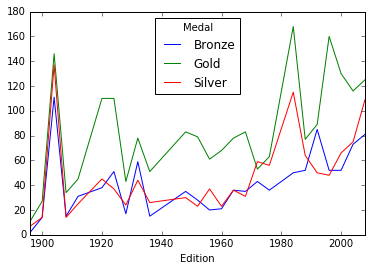

In [40]:
# Plotting country medals by year
import matplotlib.pyplot as plt
%matplotlib inline

usa = oly[ oly['NOC'] == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

/usr/lib/python3/dist-packages/pandas/core/internals.py:3239: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  block = self.blocks[self._blknos[i]]


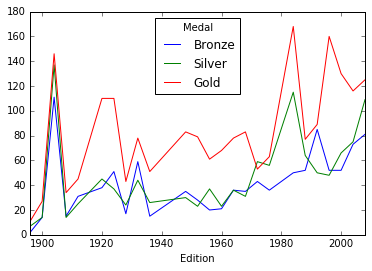

In [41]:
# Let's create a categorical index to fix the medal order
oly.Medal = pd.Categorical(values=oly.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

usa = oly[ oly['NOC'] == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()